# Logistic Regression 

## Assignment Explanation    
데이터는 x, y, label로 구성되어 있으며 2차원 평면에서의 x, y 좌표, 세 번째는 주어진 좌표의 class label, 0,1 class를 의미한다. 학습 데이터는 2차원 평면에 있는 유클리디언 공간에 있는 포인트와 레이블로 구성된다. 즉, x, y 좌표계가 있을 때 포인트가 (x,y) 2차원 포인트가 정해지고, 그들의 레이블이 0 또는 1로 주어지게 된다. 이러한 포인트들이 많이 있을 때 이것을 구분하는 classifier 함수를 찾는 것이 본 과제의 목표이다.   

Linear regression function을 f라 할 때 x, y 실수값에 대해 모델 파라미터가 theta, theta는 세개의 실수를 갖는 벡터이며 theta0 + theta1 * x+ theta2 * y 이는 p = (1,x,y) 라고 둘 때 f = theta.T*P 로 표현할 수 있다. 그리고 Logistic Regression에서는 시그모이드 함수를 사용하는데 실수 z에 대해서 σ(z)= 1/1+exp(−z)​, 미분을 하면 σ′(z)=σ(z)(1−σ(z))   

Logistic function은 주어진 x, y에 대해서 이것의 모델 파라미터가 theta라고 하면, theta0, 1,2로 나온 애가 있다면 logistic function은 sigmoid(theta.T*p) p = (1, x, y) classification은 loss = cross entropy를 사용하는데, 이것을 residual이라고 하자. ri(theta) i번째 데이터에 대해서 그것의 cross entropy를 계산한 것, 주어진 xi, yi에 대해서 이것의 logistic f와 label과의 cross entropy. 주어진 xi, yi, 모델 파라미터 theta를 통해서 logistic f를 i번째 데이터에 대한 것으로 정의하고, 이는 sigmoid(f(theta; xi, yi)) . 이 logistic h(i)와 ground truth li의 cross entropy를 통해 residual을 정의할 수 있다. h(i)는 주어진 xi, yi에 대한 로지스틱 함수! 최종적으로 optimize할 목적함수는 목적함수의 unknown은 모델 파라미터 theta이며, 주어진 학습 데이터 n개의 데이터 training sample이 주어질 때 전체 optimize 목적함수는 위에서 정의한 residual을 i번째 주어진 학습 데이터에 대한 residual을 모두 더해서 n으로 나눈 것이며, residual은 cross entropy를 통해 정의된다.   

얻고자 하는 솔루션은 로지스틱 함수를 얻는 것이 목표이다. optima란 로지스틱 함수 x, y가 인풋으로 들어올 때 함수 값을 내고 싶은데, 목적함수를 최소화하는 optima, theta를 원하는 것이다. theta* = arg min objective func 이 값이 0.5를 기준으로 해서 어떤 주어진 x, y에 대해서 이것을 로지스틱 함수에 적용을 했더니 이 값이 만약 0.5보다 크거나 같으면 레이블은 1이 되고, 0.5보다 작으면 레이블은 0으로 판단한다. 로지스틱 함수는 시그모이드를 취한 것이기 때문에 시그모이드는 그 값이 z가 0일 때 0.5 값을 갖고, z가 커지면 1에 가까워지며 작아지면 0에 가까워진다. 시그모이드는 0,1 사이의 값을 가지며 이것이 어떤 레이블이 되는 확률로 표현할 수 있게 된다. optima란 모델 파라미터를 찾아야 하는데, 로스함수가 최소가 되는 지점의 세타이다.  Gradient로 얻게 된다. 

## import library

In [1]:
import numpy as np # 제시된 것만 사용하기
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [128]:
fname_data = 'assignment_08_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
number_data = data.shape[0] # 600개의 data point

point_x = data[:, 0] # x coordinate
point_y = data[:, 1] # y
label   = data[:, 2] # label

print('number of data = ', number_data)
print('data type of point x = ', point_x.dtype)
print('data type of point y = ', point_y.dtype)

point_x_class_0 = point_x[label == 0] # x 중에 레이블 0
point_y_class_0 = point_y[label == 0]

point_x_class_1 = point_x[label == 1]
point_y_class_1 = point_y[label == 1]

number of data =  600
data type of point x =  float64
data type of point y =  float64


## plot the data

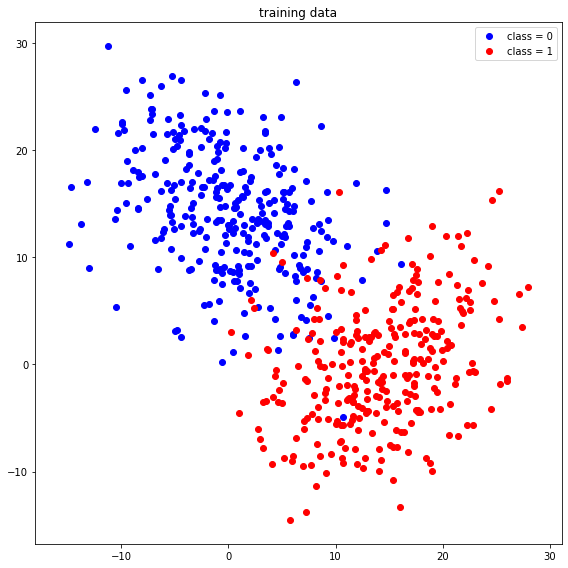

In [3]:
f = plt.figure(figsize=(8,8))   # 이를 잘 구분하는 linear classifier 찾기가 목적

plt.title('training data')
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

In [144]:
point[:5]

array([[ 1.        , 11.87317438, 16.93648772],
       [ 1.        ,  1.87060812, 11.51533802],
       [ 1.        , -7.00588728, 21.47132405],
       [ 1.        , -1.08523343, 16.42436766],
       [ 1.        ,  0.66429781, 10.68937976]])

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \theta_2)$
- point = $(1, x, y) \in \mathbb{R}^3$

In [170]:
def compute_linear_regression(theta, point): 
    # theta = 벡터, point는 하나의 포인트가 들어올 수도, 여러개가 들어올 수도 있다.
    # 첫 번째 컬럼은 1을 임의로 추가하고, 두 번째는 x, 세 번째는 y
    # f 정의하기

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    value = np.dot(point, theta.T) 
    # theta[0].reshape(600,1) + theta[1] * point[:, 1:2] + theta[2] * point[:, 2:3]
    # theta[0] + theta[1] * point[:, 1:2] + theta[2] * point[:, 2:3]
    # 
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$
- `np.exp()`

In [146]:
def sigmoid(z):
    # sigmoid 정의에 따라서 input scaler(z)이 들어왔을 때 시그모이드 출력하기

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    value = 1 / (1 + np.exp(-z))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point = $(1, x, y) \in \mathbb{R}^3$

In [147]:
def compute_logistic_regression(theta, point):
    # h 함수, 위에서 정의한 regression output에 시그모이드를 적용한 것이다.
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    value = sigmoid(compute_linear_regression(theta, point)) #0과 1사이 값으로 나타나야 하는거
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (x, y) \in \mathbb{R}^2$
- label $= l \in \{0, 1\}$   
- `np.log()`

In [284]:
def compute_residual(theta, point, label): # 얘도 (600,) 이렇게 나와야함...
    # cross entropy
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h = compute_logistic_regression(theta, point)
    h = h.reshape(h.size , 1)
    label = label.reshape(label.size , 1)
    residual = - label * np.log(h + 1e-7) - (1 - label) * np.log(1 - h + 1e-7)
    # - label * np.log(h + 1e-7).T - (1 - label) * np.log(1 - h + 1e-7).T # y = 0, 1 각각
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

In [279]:
input1  = np.array([0.1, 0.2, 0.3])
input2  = np.array([[1, 2, 3], [1, -2, -3]])
input3  = np.array([0, 1])

In [280]:
compute_residual(input1, input2, input3)

(2, 1)


array([[1.6204169 ],
       [1.46328204]])

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [281]:
def compute_loss(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    loss = (1 / point.shape[0]) * np.sum(compute_residual(theta, point, label))
    #(1 / point.shape[0]) * np.sum(compute_residual(theta, point, label))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

In [309]:
compute_loss(input1, input2, input3)

1.541849469862507

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [303]:
def compute_gradient(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    h = compute_logistic_regression(theta, point)
    # 로스에 대한 파라미터의 gradient 구하고 descent 통해 최적화
    h = h.reshape(h.size , 1) # (600,1)
    label = label.reshape(label.size , 1) # (600,1)
    gradient = (1 / point.shape[0]) * np.dot(point[:, 1:2].T, (h - label))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

문제 - 세타가 동일한 값으로 세개가 나옴...

## initialize the gradient descent algorithm

In [307]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

number_point_class_0    = len(point_x_class_0)
number_point_class_1    = len(point_x_class_1)

point_class_0   = np.ones((number_point_class_0, 3))
point_class_1   = np.ones((number_point_class_1, 3))

point_class_0[:, 1] = point_x_class_0
point_class_0[:, 2] = point_y_class_0
 
point_class_1[:, 1] = point_x_class_1
point_class_1[:, 2] = point_y_class_1

label_0     = np.zeros(number_point_class_0)
label_1     = np.ones(number_point_class_1)

point = np.concatenate((point_class_0, point_class_1), axis=0)
label = np.concatenate((label_0, label_1), axis=0)

print('shape of point_class_0 : ', point_class_0.shape)
print('shape of point_class_1 : ', point_class_1.shape)
print('shape of label_0 : ', label_0.shape)
print('shape of label_1 : ', label_1.shape)

print('shape of point : ', point.shape)
print('shape of label : ', label.shape)

shape of point_class_0 :  (300, 3)
shape of point_class_1 :  (300, 3)
shape of label_0 :  (300,)
shape of label_1 :  (300,)
shape of point :  (600, 3)
shape of label :  (600,)


## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [308]:
for i in range(num_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    theta   = theta - learning_rate * compute_gradient(theta, point, label)
    loss    = compute_loss(theta, point, label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    print(i)
    theta_iteration[i, :]   = theta
    print('theta' ,':', theta)
    loss_iteration[i]       = loss
    print('loss',':', loss)

theta_optimal = theta

0
theta : [0.00353072 0.00353072 0.00353072]
loss : 0.693856020799942
1
theta : [0.00694137 0.00694137 0.00694137]
loss : 0.6953977494788668
2
theta : [0.01023644 0.01023644 0.01023644]
loss : 0.6976832131624972
3
theta : [0.01342059 0.01342059 0.01342059]
loss : 0.700629533954012
4
theta : [0.01649855 0.01649855 0.01649855]
loss : 0.7041602635475882
5
theta : [0.0194751 0.0194751 0.0194751]
loss : 0.708205482198756
6
theta : [0.02235492 0.02235492 0.02235492]
loss : 0.7127016996506412
7
theta : [0.02514264 0.02514264 0.02514264]
loss : 0.7175916111886794
8
theta : [0.02784272 0.02784272 0.02784272]
loss : 0.7228237551182358
9
theta : [0.03045948 0.03045948 0.03045948]
loss : 0.7283521098110237
10
theta : [0.03299706 0.03299706 0.03299706]
loss : 0.7341356602744024
11
theta : [0.03545942 0.03545942 0.03545942]
loss : 0.7401379567131582
12
theta : [0.03785031 0.03785031 0.03785031]
loss : 0.7463266811504315
13
theta : [0.04017329 0.04017329 0.04017329]
loss : 0.7526732329649293
14
theta

KeyboardInterrupt: 

In [306]:
theta_optimal

array([0.71644517, 0.71644517, 0.71644517])

___

___

## functions for presenting the results

___

___

In [59]:
def function_result_01():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_linear_regression(input1, input2)
    
    print(value)

In [60]:
def function_result_02():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_logistic_regression(input1, input2)

    print(value)

In [61]:
def function_result_03():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([0, 1])

    value = compute_residual(input1, input2, input3)

    print(value)

In [ ]:
function_result_03()

3.083606126298439


In [62]:
def function_result_04():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_loss(input1, input2, input3)

    print(value)

In [63]:
def function_result_05():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_gradient(input1, input2, input3)

    print(value)

In [64]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [65]:
def function_result_07():
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    plt.plot(theta_iteration[:, 0], '-', color='red', label=r'$\theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label=r'$\theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label=r'$\theta_2$')
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [ ]:
def function_result_08():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

## plot the logistic regression values over the 2-dimensional Euclidean space

In [ ]:
def function_result_09():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
[ 1.4 -1.2]
**************************************************
## [RESULT 02]
**************************************************
[0.80218389 0.23147522]
**************************************************
## [RESULT 03]
**************************************************
3.083606126298439
**************************************************
## [RESULT 04]
**************************************************
[1.54180306]
**************************************************
## [RESULT 05]
**************************************************
[[1. 1.]]
**************************************************
## [RESULT 06]
**************************************************


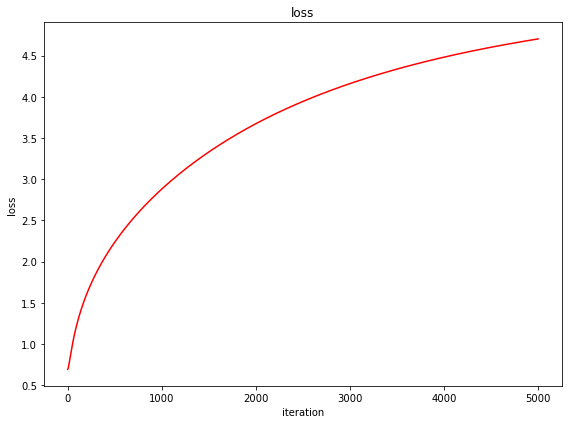

**************************************************
## [RESULT 07]
**************************************************


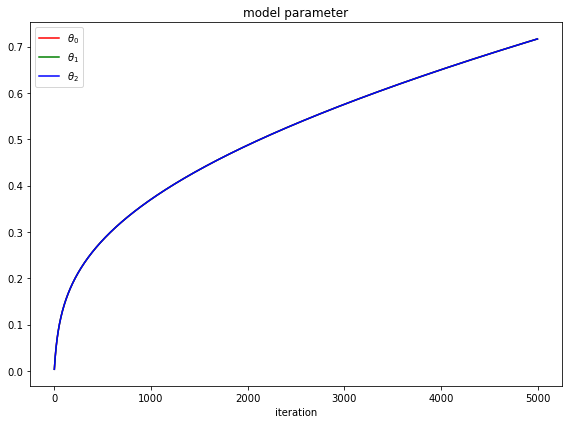

In [181]:
number_result = 7

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)

**************************************************
## [RESULT 01]
**************************************************
**************************************************
## [RESULT 02]
**************************************************
**************************************************
## [RESULT 03]
**************************************************
**************************************************
## [RESULT 04]
**************************************************
**************************************************
## [RESULT 05]
**************************************************
**************************************************
## [RESULT 06]
**************************************************
**************************************************
## [RESULT 07]
**************************************************
**************************************************
## [RESULT 08]
**************************************************


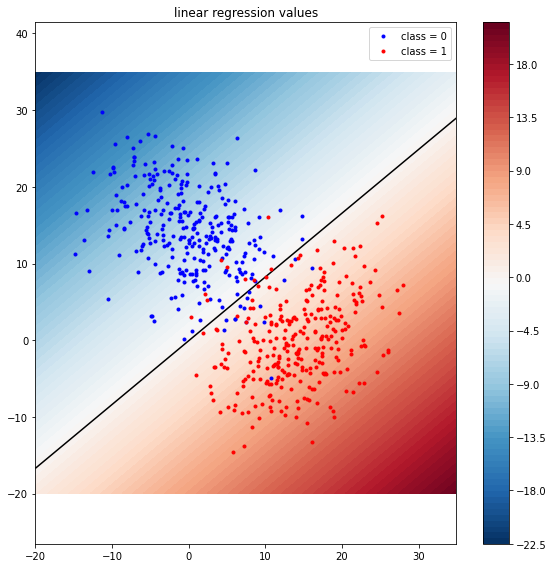

**************************************************
## [RESULT 09]
**************************************************


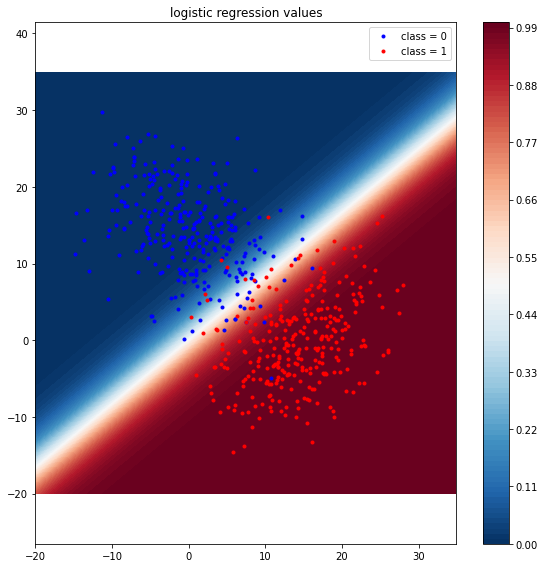

In [ ]:
number_result = 9

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)